In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
data = pd.read_csv("adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
#data clean up
#eventueel te verwijderen columnen: relationship, marital-status, (capital gain/loss idk wat is), 
print("Before clean up:",len(data))

dataExcluding = data[data['native-country'] != '?']
print("After removing '?' from 'native-country' column: ",len(dataExcluding))
df = dataExcluding

Before clean up: 48842
After removing '?' from 'native-country' column:  47985


In [4]:
#native country, education want education-num.
   
print(f"\nage range: {min(df.age)} to {max(df.age)}")
print(f"\npercentage >50k: {((df['income'] == '>50K').mean() * 100):.2f}%, <=50k: {((df['income'] == '<=50K').mean() * 100):.2f}%")
print(f"\nTotal >50k: {((df['income'] == '>50K').sum())}, <=50k: {((df['income'] == '<=50K').sum())}")
print(f"\npercentage White: {((df['race'] == 'White').mean() * 100):.2f}%, Black: {((df['race'] == 'Black').mean() * 100):.2f}%, Asian-Pac-Islander: {((df['race'] == 'Asian-Pac-Islander').mean() * 100):.2f}%, Amer-Indian-Eskimo: {((df['race'] == 'Amer-Indian-Eskimo').mean() * 100):.2f}%, Other: {((df['race'] == 'Other').mean() * 100):.2f}%")
print(f"\nTotal White: {((df['race'] == 'White').sum())}, Black: {((df['race'] == 'Black').sum())}, Asian-Pac-Islander: {((df['race'] == 'Asian-Pac-Islander').sum())}, Amer-Indian-Eskimo: {((df['race'] == 'Amer-Indian-Eskimo').sum())}, Other: {((df['race'] == 'Other').sum())}")
print(f"\npercentage Male: {((df['gender'] == 'Male').mean() * 100):.2f}%, Female: {((df['gender'] == 'Female').mean() * 100):.2f}%")
print(f"\nTotal Male: {((df['gender'] == 'Male').sum())}, Female: {((df['gender'] == 'Female').sum())}")

# Group df by education level
gender_groups = df.groupby('gender')
# income split by education levels
education_groups = df.groupby('education')
# income split by race
race_groups = df.groupby('race')

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = education_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = education_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Highest education Level': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_df.to_string(index=False)}")

# gender split by education levels
# Calculate percentage of people with income >50K and <=50K for each education level
percentage_male = education_groups['gender'].apply(lambda x: (x == 'Male').mean() * 100)
percentage_female = education_groups['gender'].apply(lambda x: (x == 'Female').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Highest education Level': percentage_male.index,
    'Male Percentage': percentage_male.values,
    'Female Percentage': percentage_female.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_df.to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = race_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = race_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Race': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})
# Print the overview table without numbers in front of the values
print(f"\n{overview_df.sort_values(by='>50K Percentage', ascending=False).to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_male = race_groups['gender'].apply(lambda x: (x == 'Male').mean() * 100)
percentage_female = race_groups['gender'].apply(lambda x: (x == 'Female').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Race': percentage_male.index,
    'Male Percentage': percentage_male.values,
    'Female Percentage': percentage_female.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_df.to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = gender_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = gender_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Gender': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})
# Print the overview table
print(f"\n{overview_df.sort_values(by='>50K Percentage', ascending=False).to_string(index=False)}")



age range: 17 to 90

percentage >50k: 23.90%, <=50k: 76.10%

Total >50k: 11467, <=50k: 36518

percentage White: 85.84%, Black: 9.49%, Asian-Pac-Islander: 2.90%, Amer-Indian-Eskimo: 0.98%, Other: 0.80%

Total White: 41189, Black: 4553, Asian-Pac-Islander: 1391, Amer-Indian-Eskimo: 470, Other: 382

percentage Male: 66.77%, Female: 33.23%

Total Male: 32041, Female: 15944

Highest education Level  >50K Percentage  <=50K Percentage
                   10th         6.268222         93.731778
                   11th         5.055556         94.944444
                   12th         7.086614         92.913386
                1st-4th         3.333333         96.666667
                5th-6th         4.897959         95.102041
                7th-8th         6.337272         93.662728
                    9th         5.234899         94.765101
             Assoc-acdm        25.775807         74.224193
              Assoc-voc        25.368008         74.631992
              Bachelors        41.40

In [5]:
y_attr_names = data.columns.tolist()
X_data_numpy = data.to_numpy()
print(y_attr_names)
print(X_data_numpy[:2, :])

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
[[25 'Private' 226802 '11th' 7 'Never-married' 'Machine-op-inspct'
  'Own-child' 'Black' 'Male' 0 0 40 'United-States' '<=50K']
 [38 'Private' 89814 'HS-grad' 9 'Married-civ-spouse' 'Farming-fishing'
  'Husband' 'White' 'Male' 0 0 50 'United-States' '<=50K']]


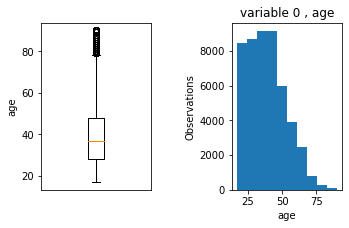

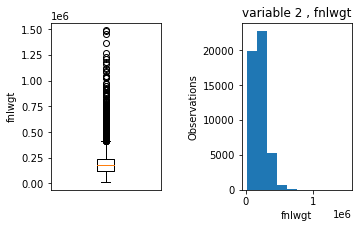

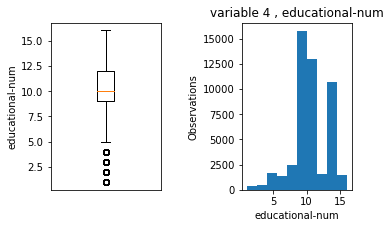

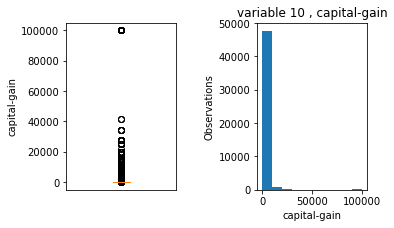

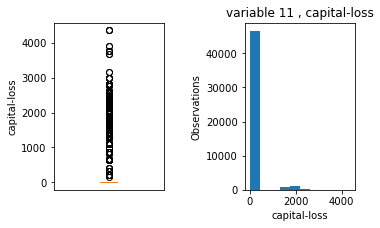

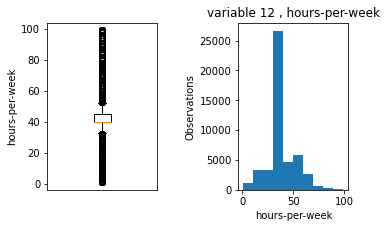

In [6]:
#data clean up
#eventueel te verwijderen columnen: relationship, marital-status, (capital gain/loss idk wat is), 
# print("Before clean up:",len(data))

# dataExcluding = df[data['native-country'] != '?']
# print("After removing '?' from 'native-country' column: ",len(dataExcluding))
# df = dataExcluding

numerical_variables = np.array(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

indices_numerical_variables = np.where(np.isin(y_attr_names, numerical_variables))[0]  # indices where numerical_variables coincide with y_attr_names
for i in range(indices_numerical_variables.size):
    f, (boxp, histo) = plt.subplots(1,2)
    f.tight_layout(pad=5.0)
    boxp.boxplot(X_data_numpy[:, indices_numerical_variables[i]])
    boxp.xaxis.set_visible(False)
    boxp.set(ylabel = "{}".format(numerical_variables[i]))
    plt.title("variable {} , {}".format(indices_numerical_variables[i], numerical_variables[i]))
    histo.hist(X_data_numpy[:, indices_numerical_variables[i]])
    plt.xlabel("{}".format(numerical_variables[i]))
    plt.ylabel("Observations")
#     plt.savefig("variable_{}_{}.png".format(indices_numerical_variables[i], numerical_variables[i])) save as png

plt.show()

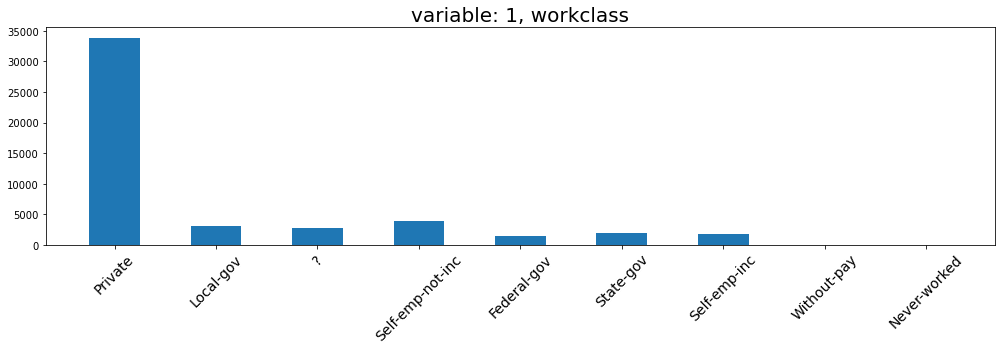

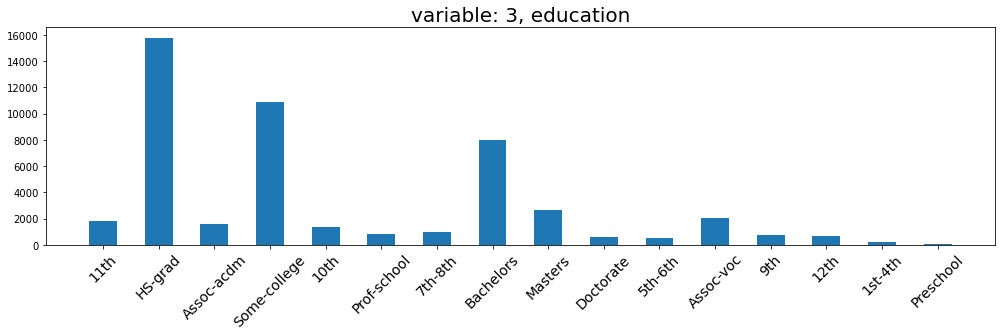

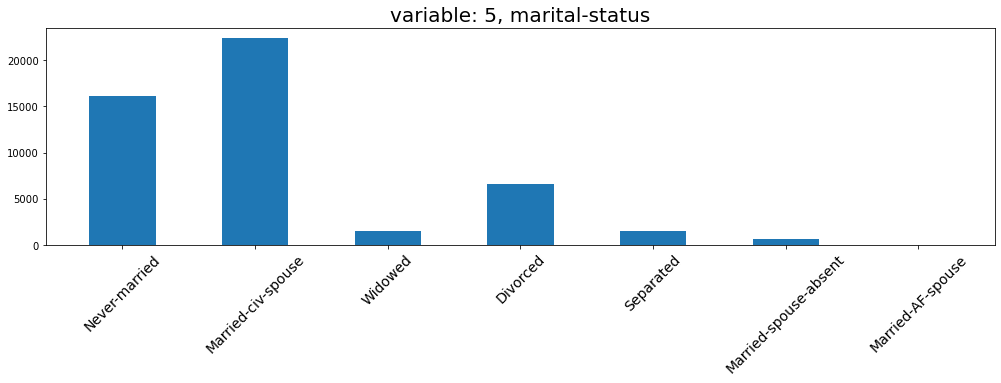

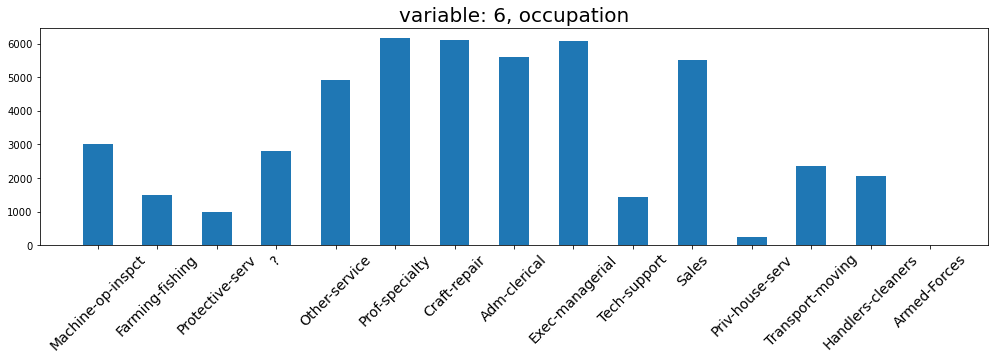

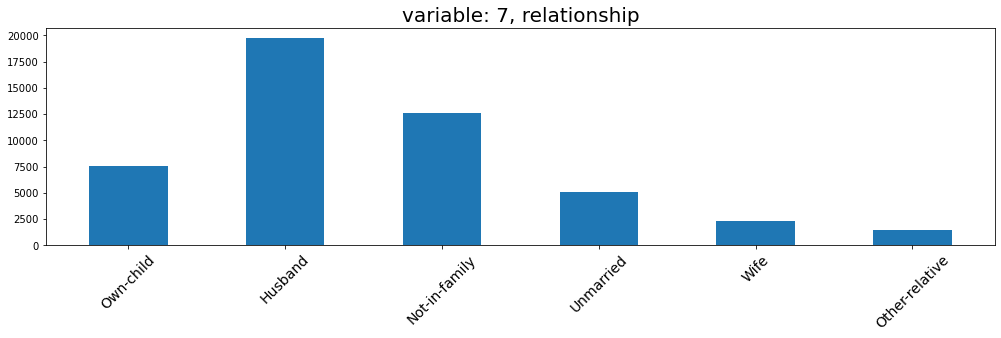

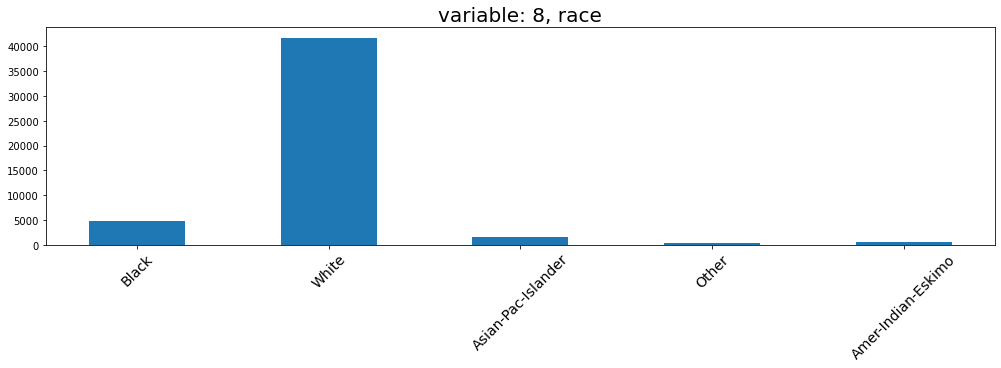

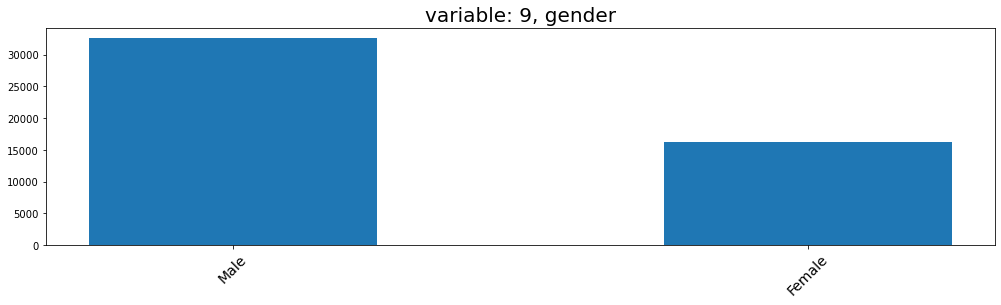

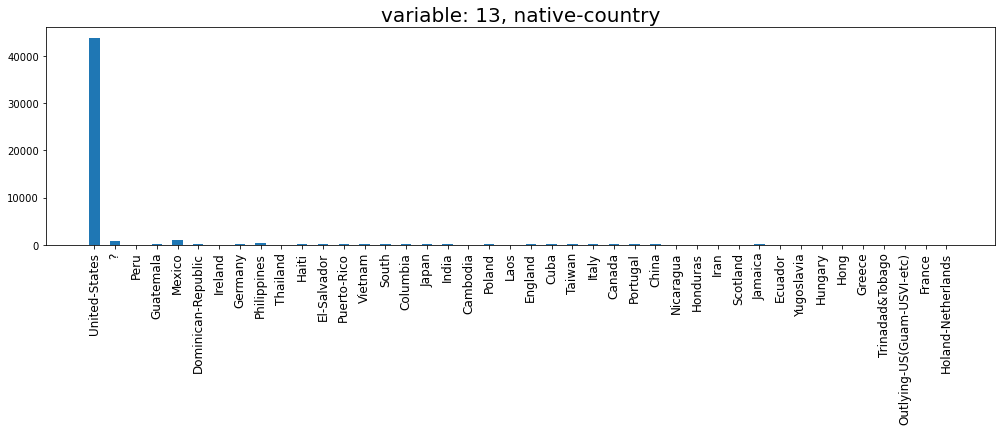

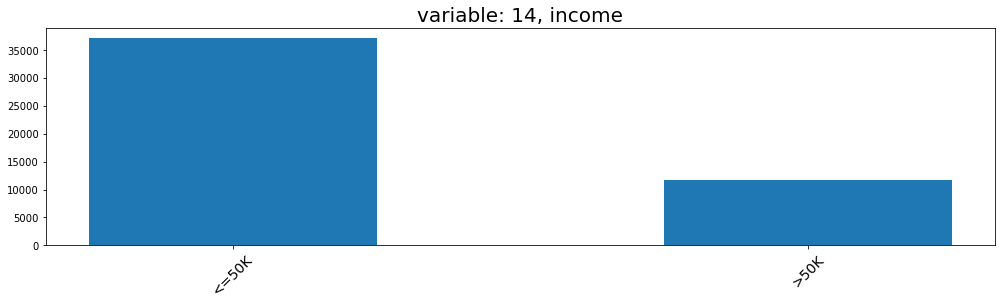

In [7]:
from collections import Counter

categorical_variables = np.array(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'])

indices_categorical_variables = np.where(np.isin(y_attr_names, categorical_variables))[0]

for i in range(indices_categorical_variables.size) :
    counter = Counter(X_data_numpy[:, indices_categorical_variables[i]])
    categories = list(counter.keys())
    values = list(counter.values())
    plt.tight_layout
    fig = plt.figure(figsize=(17,4))
    plt.bar(categories, values, width = 0.5)
    plt.title("variable: {}, {}".format(indices_categorical_variables[i], categorical_variables[i]), fontsize=20)
    if (categorical_variables[i] == 'native-country') :
        plt.xticks(rotation=90, fontsize=12)
    else :
        plt.xticks(rotation=45, fontsize=14)
#     plt.savefig("variable_{}_{}.png".format(indices_categorical_variables[i], categorical_variables[i]), bbox_inches='tight')
    plt.show()

In [31]:
#vars for both implementation
testSize = 0.2

## Adaboost implementation
todo: 
- toevoegen k-folds reps
- beste resultaten bijhouden in variable
- adaboost decision tree weergeven

In [15]:
# prepare testsets
# y_attr_names / X_data_numpy
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV is een test
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('income', axis=1)
y = df['income']

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

In [18]:
# Define the parameter grid for the base classifier
max_depths_test = [1, 2, 3, 4, 5] # na 5 loopt snel omlaag.

for i in max_depths_test:
    # Initialize AdaBoost Classifier with Decision Trees
    base_classifier = DecisionTreeClassifier(max_depth=i)
    ada_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

    # Train the Model
    ada_classifier.fit(X_train, y_train)

    # Make Predictions
    y_pred = ada_classifier.predict(X_test)

    # Evaluate the Model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'max depth {i}, Accuracy: {accuracy}')

max depth 1, Accuracy: 0.8575596540585599
max depth 2, Accuracy: 0.8670417838907992
max depth 3, Accuracy: 0.8673543815775763
max depth 4, Accuracy: 0.8637074085651766
max depth 5, Accuracy: 0.8563092633114515


In [17]:
# Define the parameter grid for the base classifier
max_depths_test = [1, 2, 3, 4, 5] # na 5 loopt snel omlaag.

accuracyArray = []
# fix variable die beste accuracy onthoud
for i in max_depths_test:
    base_classifier = DecisionTreeClassifier(max_depth=i)
    ada_classifier = AdaBoostClassifier(base_classifier, random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    }

    # Create the GridSearchCV object with parallel processing
    grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best parameters for max_depth {i}: {grid_search.best_params_}")

    # Get the best model
    best_ada_classifier = grid_search.best_estimator_
    
    # Evaluate the best model on the test set
    y_pred = best_ada_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for max_depth {i}: {accuracy}')

Best parameters for max_depth 1: {'learning_rate': 1.0, 'n_estimators': 150}
Accuracy for max_depth 1: 0.8630822131916224
Best parameters for max_depth 2: {'learning_rate': 1.0, 'n_estimators': 100}
Accuracy for max_depth 2: 0.8667291862040221
Best parameters for max_depth 3: {'learning_rate': 0.1, 'n_estimators': 150}
Accuracy for max_depth 3: 0.8697509638428675
Best parameters for max_depth 4: {'learning_rate': 0.1, 'n_estimators': 150}
Accuracy for max_depth 4: 0.8694383661560905
Best parameters for max_depth 5: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy for max_depth 5: 0.8712097530478274


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the AdaBoost classifier
base_classifier = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_ada_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_ada_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Best parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 150}
Accuracy: 0.8697509638428675


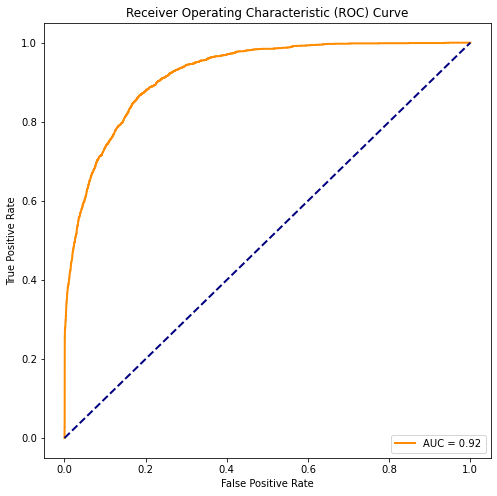

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained an AdaBoostClassifier named 'best_ada_classifier'
# Make sure 'best_ada_classifier' is fitted on your training data

# Get predicted probabilities for the positive class (class 1)
y_probs = best_ada_classifier.predict_proba(X_test)[:, 1]

# Convert class labels to binary (0 and 1)
y_true_binary = (y_test == '>50K').astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_binary, y_probs)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_true_binary, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

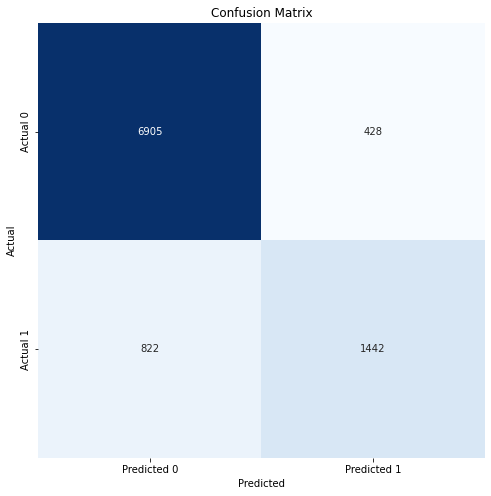

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained an AdaBoostClassifier named 'best_ada_classifier'
# Make sure 'best_ada_classifier' is fitted on your training data

# Get predicted classes
y_pred = best_ada_classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
